# Simple Linear Regression

#### Bussiness Objective

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

#### Details of the various variables:

In [1]:
import pandas as pd 
data = pd.read_csv('Boston1.csv')
data.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [9]:
data.shape

(506, 14)

In [3]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Let us take out the dependent and indpendent vaiables from the dataset

In [10]:
data_ = data.loc[:,['lstat','medv']]
data_.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


# Visualizing variables

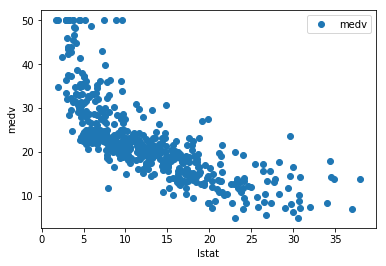

In [11]:
import matplotlib.pyplot as plt
data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# Preparing data

In [12]:
X = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])

In [13]:
X.size, y.size

(506, 506)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(regressor.intercept_)

[34.33497839]


In [18]:
print(regressor.coef_)

[[-0.92441715]]


In [19]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [20]:
y_pred

,Predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168
5,24.055460
6,29.990218
7,22.280579
8,17.769423
9,26.190863


In [21]:
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
132,23.0
292,27.9
31,14.5
218,21.5
90,22.6


In [22]:
from sklearn import metrics 
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.078127727696938
Mean Squared Error: 46.99482091954711
Root Mean Squared Error: 6.855276866731723


# Mulitple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Boston1.csv')
dataset

In [ ]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [ ]:
v

In [ ]:
w

In [ ]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

In [ ]:
y_test

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))